# Kendall Rank Correlation

Also commonly known as “Kendall’s tau coefficient”. Kendall’s Tau coefficient and Spearman’s rank correlation coefficient assess statistical associations based on the ranks of the data. Kendall rank correlation (non-parametric) is an alternative to Pearson’s correlation (parametric) when the data you’re working with has failed one or more assumptions of the test. This is also the best alternative to Spearman correlation (non-parametric) when your sample size is small and has many tied ranks.

For more info - check out my blog - https://medium.com/@joseph.magiya/kendall-rank-correlation-explained-dee01d99c535

In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau

In [2]:
# Data Visualisation Settings 
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

Data Source <br>
https://www.kaggle.com/chirin/africa-economic-banking-and-systemic-crisis-data

In [3]:
# Import the data
african_crises = pd.read_csv("african_crises.csv")

In [4]:
african_crises.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


The banking_crisis column is text, let's change it to numbers so we can do some co-relation. <br>
But first let's see the unique values in the column

In [5]:
african_crises.banking_crisis.unique()

array(['crisis', 'no_crisis'], dtype=object)

We'll put 1 for crisis and 0 for no_crisis

In [6]:
african_crises['banking_crisis'] = african_crises['banking_crisis'].map({'crisis': 1, 'no_crisis': 0})

In [7]:
african_crises.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0


I'm going to drop cc3 and Country and keep only the numeric variable. <br>
We can't do a correlation on text values.

Plot pairwise relationships in a dataset. <br>
https://seaborn.pydata.org/generated/seaborn.pairplot.html <br>
By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.<br>
The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.<br>

In [8]:
# sb.pairplot(african_crises)

### Use .corr() to calculate the Kendall Tau Statistic

This will return the Kendall Rank Correlation for each variable in your dataframe

In [9]:
corr = african_crises.corr(method='kendall')
# corr

For more information on dataframe.corr() - https://medium.com/@joseph.magiya/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04

Another way to see the degree of linear co-relation of variables is to generate a heatmap from seaborn of the varaibles <br>

Gives you a quick glance of the corelation

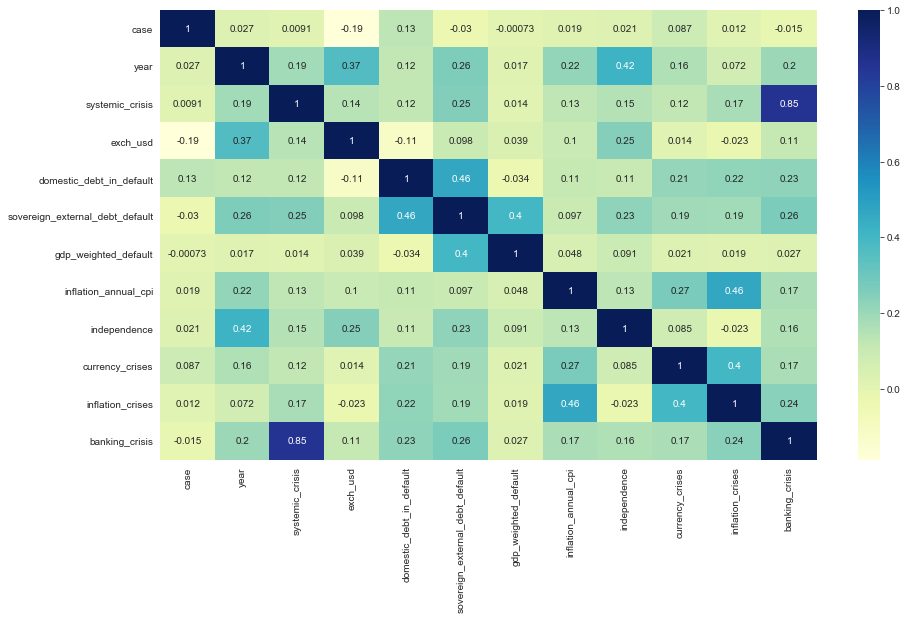

In [10]:
rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

Now what does this mean?? <br>
The dark shades indicate a strong negative corelation <br>
The lighter shades indicate a strong positive corelation <br>
i.e if any variable is plotted against itself, it'll have a corelation of 1 <br>